In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [6]:
from sklearn.model_selection import train_test_split

In [8]:
x_train , x_test ,y_train ,y_test = train_test_split(df.drop(columns=['Survived']) , df.Survived, test_size= 0.2 ,random_state=42)

In [9]:
x_train['Age_99'] = x_train.Age.fillna(150)

In [10]:
x_train

,Age,Fare,Family,Age_99
331,45.5,28.5000,0,45.5
733,23.0,13.0000,0,23.0
382,32.0,7.9250,0,32.0
704,26.0,7.8542,1,26.0
813,6.0,31.2750,6,6.0
...,...,...,...,...
106,21.0,7.6500,0,21.0
270,NaN,31.0000,0,150.0
860,41.0,NaN,2,41.0
435,14.0,120.0000,3,14.0


In [11]:
x_train["Age_minus1"] = x_train.Age.fillna(-1)

In [16]:
x_train.describe()

,Age,Fare,Family,Age_99,Age_minus1
count,572.000000,676.000000,712.000000,712.000000,712.000000
mean,29.498846,32.517788,0.932584,53.192893,23.501882
std,14.500059,52.545518,1.682525,49.657126,17.776262
min,0.420000,0.000000,0.000000,0.420000,-1.000000
25%,21.000000,7.925000,0.000000,22.000000,5.000000
50%,28.000000,14.400000,0.000000,32.000000,24.000000
75%,38.000000,30.500000,1.000000,54.000000,35.000000
max,80.000000,512.329200,10.000000,150.000000,80.000000


In [17]:
x_train['Fare_999'] = x_train.Fare.fillna(999)

In [18]:
x_train['Fare_minus1']= x_train.Fare.fillna(-1)

In [20]:
x_train.describe()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
count,572.000000,676.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,29.498846,32.517788,0.932584,53.192893,23.501882,81.384866,30.823068
std,14.500059,52.545518,1.682525,49.657126,17.776262,218.003373,51.722717
min,0.420000,0.000000,0.000000,0.420000,-1.000000,0.000000,-1.000000
25%,21.000000,7.925000,0.000000,22.000000,5.000000,7.925000,7.895800
50%,28.000000,14.400000,0.000000,32.000000,24.000000,15.372900,13.000000
75%,38.000000,30.500000,1.000000,54.000000,35.000000,37.503150,29.775000
max,80.000000,512.329200,10.000000,150.000000,80.000000,999.000000,512.329200


In [21]:
df.var()

Age          211.019125
Fare        2530.673077
Family         2.603248
Survived       0.236772
dtype: float64

In [24]:
x_train[['Age' , 'Fare']].var()

Age      210.251707
Fare    2761.031435
dtype: float64

In [25]:
x_train[['Age' , 'Age_99' , 'Age_minus1']].var()

Age            210.251707
Age_99        2465.830174
Age_minus1     315.995504
dtype: float64

In [27]:
x_train[['Fare', 'Fare_999' , "Fare_minus1"]].var()

Fare            2761.031435
Fare_999       47525.470595
Fare_minus1     2675.239405
dtype: float64

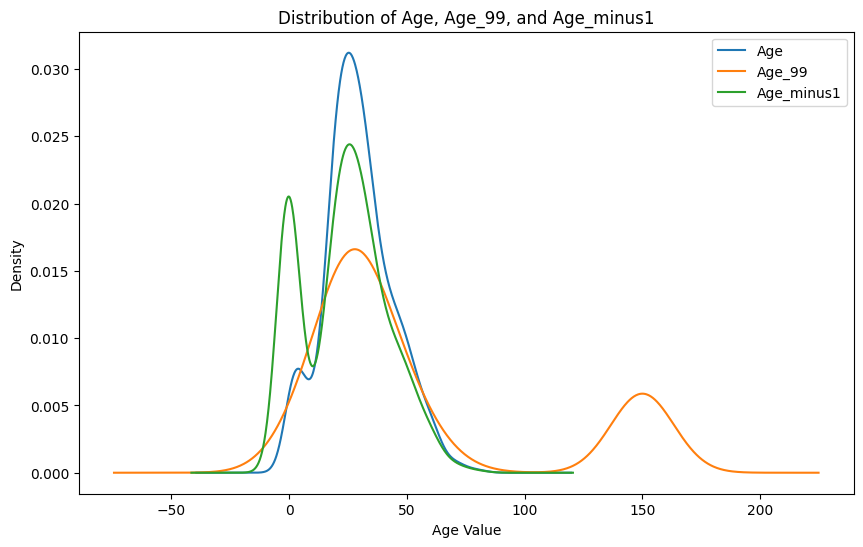

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
x_train['Age'].plot(kind='kde', label='Age')
x_train['Age_99'].plot(kind='kde', label='Age_99')
x_train['Age_minus1'].plot(kind='kde', label='Age_minus1')
plt.xlabel('Age Value')
plt.ylabel('Density')
plt.title('Distribution of Age, Age_99, and Age_minus1')
plt.legend()
plt.show()

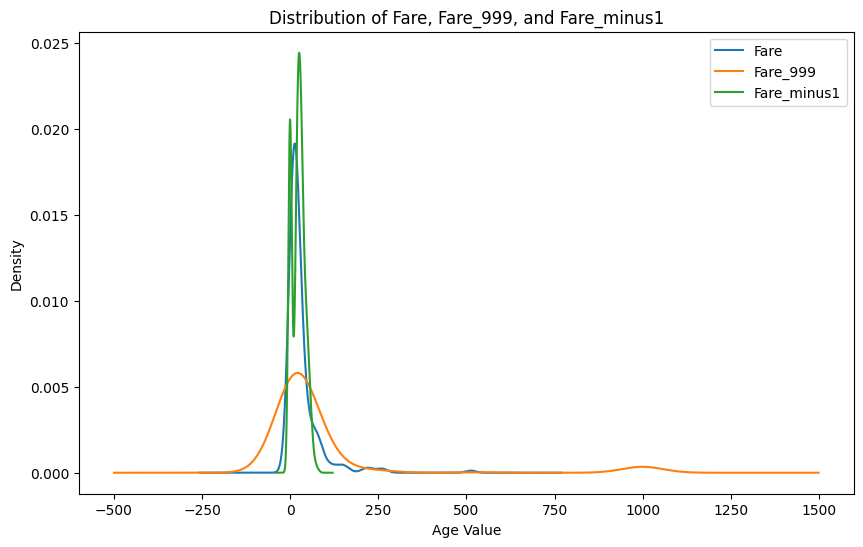

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
x_train['Fare'].plot(kind='kde', label='Fare')
x_train['Fare_999'].plot(kind='kde', label='Fare_999')
x_train['Age_minus1'].plot(kind='kde', label='Fare_minus1')
plt.xlabel('Age Value')
plt.ylabel('Density')
plt.title('Distribution of Fare, Fare_999, and Fare_minus1')
plt.legend()
plt.show()

In [30]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162
Fare,75.481375,2761.031435,18.599163,-238.317980,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-7.914770,-5.034556,16.878492,17.684447
Age_99,210.251707,-238.317980,-7.914770,2465.830174,-412.513337,-519.110524,-216.094831
Age_minus1,210.251707,135.785804,-5.034556,-412.513337,315.995504,262.712284,124.270305
Fare_999,130.495777,2761.031435,16.878492,-519.110524,262.712284,47525.470595,1063.944817
Fare_minus1,69.137162,2761.031435,17.684447,-216.094831,124.270305,1063.944817,2675.239405


In [31]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.039967,0.085422
Fare,0.091482,1.000000,0.207193,-0.090787,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.094732,-0.168329,0.046016,0.203212
Age_99,1.000000,-0.090787,-0.094732,1.000000,-0.467322,-0.047953,-0.084136
Age_minus1,1.000000,0.145071,-0.168329,-0.467322,1.000000,0.067792,0.135159
Fare_999,0.039967,1.000000,0.046016,-0.047953,0.067792,1.000000,0.094357
Fare_minus1,0.085422,1.000000,0.203212,-0.084136,0.135159,0.094357,1.000000


In [34]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [33]:
impute_99 = SimpleImputer(strategy='constant' , fill_value=99)
impute_999 = SimpleImputer(strategy='constant' , fill_value=999)

In [35]:
t1 = ColumnTransformer([
    ('impute_99' , impute_99, ["Age"]),
    ('impute_999' , impute_999, ["Fare"])
],remainder='passthrough')

In [36]:
t1.fit(x_train)

,transformers,"[('impute_99', ...), ('impute_999', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,99
